## Data Augmentation using Keras


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,  
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(r'C:\Users\ajarun\DL\temp\Marker.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `temp/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='temp', save_prefix='Marker', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
'''ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format='channels_last',
    validation_split=0.0,
    interpolation_order=1,
    dtype='float32',)'''

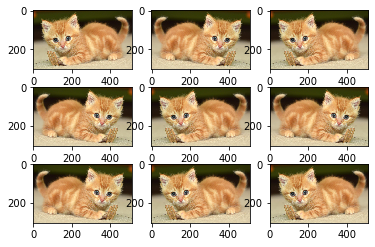

In [5]:
#Reference Jason Brownlee
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img(r'C:\Users\ajarun\DL\cat.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(width_shift_range=[-200,200]) #width_shift_range[min,max] for horizontal shift
#datagen = ImageDataGenerator(height_shift_range=0.5) #height_shift_range=0.5 (50% of image) for vertical shift
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Data Augmentation using Augmentor

### Installiing Augmentor

In [84]:
#!pip install Augmentor

### Initialising a pipeline

In [85]:
import Augmentor
p = Augmentor.Pipeline(r"C:\Users\ajarun\ineuron\dataAugmentation\new")

Initialised with 16 image(s) found.
Output directory set to C:\Users\ajarun\ineuron\dataAugmentation\new\output.

### Rotating

> Rotating can be performed in a number of ways. When rotating by modulo 90, the image is simply rotated and saved. To rotate by arbitrary degrees, then a crop is taken from the centre of the newly rotated image.

Rotate functions that are available are:

-    rotate()
-    rotate90()
-    rotate180()
-    rotate270()
-    rotate_random_90()


#### Abouth the probabilty argument

- probability – A value between 0 and 1 representing the probability that the operation should be performed.

In [86]:
p.rotate(probability=0.3, max_left_rotation=10, max_right_rotation=10)

In [87]:
p.rotate90(probability=0.3)

In [88]:
p.rotate270(probability=0.3)

### Flipping

Flip (mirror) the image along its horizontal axis, i.e. from left to right.

In [89]:
p.flip_left_right(probability=0.3)

Flip (mirror) the image along its vertical axis, i.e. from top to bottom.

In [90]:
p.flip_top_bottom(probability=0.3)

### Cropping

Crop a random area of an image, based on the percentage area to be returned.

This function crops a random area from an image, based on the area you specify using percentage_area.

In [91]:
p.crop_random(probability=.1, percentage_area=0.5)

- percentage_area (Float) – The area, as a percentage of the current image’s area, to crop.
- randomise_percentage_area (Boolean) – If True, will use percentage_area as an upper bound and randomise the crop from between 0 and percentage_area.

### Resizing

Resize an image according to a set of dimensions specified by the user in pixels.

In [92]:
p.resize(probability=0.1, width=100, height=100)

- width (Integer) – The new width that the image should be resized to.
- height (Integer) – The new height that the image should be resized to.

### Random Brightness

Random change brightness of an image.

In [93]:
p.random_brightness(probability = 0.5, min_factor=0.4, max_factor=0.9)

- min_factor – The value between 0.0 and max_factor that define the minimum adjustment of image brightness. The value 0.0 gives a black image, value 1.0 gives the original image, value bigger than 1.0 gives more bright image.

- max_factor – A value should be bigger than min_factor that define the maximum adjustment of image brightness. The value 0.0 gives a black image, value 1.0 gives the original image, value bigger than 1.0 gives more bright image.

### Random Color

Random change saturation of an image.

In [94]:
p.random_color(probability=0.5, min_factor=0.4, max_factor=0.9)

- min_factor – The value between 0.0 and max_factor that define the minimum adjustment of image saturation. The value 0.0 gives a black and white image, value 1.0 gives the original image.
- max_factor – A value should be bigger than min_factor that define the maximum adjustment of image saturation. The value 0.0 gives a black and white image, value 1.0 gives the original image.

### Random Contrast

Random change image contrast.

In [95]:
p.random_contrast(probability=0.5, min_factor=0.9, max_factor=1.4)

- min_factor – The value between 0.0 and max_factor that define the minimum adjustment of image contrast. The value 0.0 gives s solid grey image, value 1.0 gives the original image.
- max_factor – A value should be bigger than min_factor that define the maximum adjustment of image contrast. The value 0.0 gives s solid grey image, value 1.0 gives the original image.

### Random distortion

Random distortions allow you to make distortions to an image while maintaining the image’s aspect ratio.


This function performs a randomised, elastic distortion controlled by the parameters specified. The grid width and height controls how fine the distortions are. Smaller sizes will result in larger, more pronounced, and less granular distortions. Larger numbers will result in finer, more granular distortions. The magnitude of the distortions can be controlled using magnitude.

In [96]:
p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)

- grid_width (Integer) – The number of rectangles in the grid’s horizontal axis.
- grid_height (Integer) – The number of rectangles in the grid’s vertical axis.
- magnitude (Integer) – The magnitude of the distortions.

### Random Erasing

This operation performs a Random Erasing operation, as described in https://arxiv.org/abs/1708.04896 by Zhong et al.

Its purpose is to make models robust to occlusion, by randomly replacing rectangular regions with random pixel values.

For greyscale images the random pixels values will also be greyscale, and for RGB images the random pixels values will be in RGB.



In [97]:
p.random_erasing(probability=0.5, rectangle_area=0.2)

- rectangle_area – The percentage area of the image to occlude with the random rectangle, between 0.1 and 1.

### Zooming

Zoom in to an image, while maintaining its size. The amount by which the image is zoomed is a randomly chosen value between min_factor and max_factor.

In [98]:
p.zoom(probability=0.7, min_factor=1.1, max_factor=1.5)

- min_factor (Float) – The minimum factor by which to zoom the image.
- max_factor (Float) – The maximum factor by which to zoom the image.

### Output

In [99]:
# Change the samples size according to requirements
p.sample(250)

Processing <PIL.Image.Image image mode=RGB size=500x336 at 0x1AE811C89B0>: 100%|█| 250/250 [00:12<00:00, 20.82 Samples/


## EXPLORE MORE OPERATIONS

[OFFICIAL DOCUMENTATION] : https://augmentor.readthedocs.io/en/master/index.html